In [1]:
# import pandas
import pandas as pd

#Set cols to view 50
pd.set_option('display.max_columns', 50)

#Import data
data = pd.read_csv("shelter-animal-outcomes/train.csv.gz")

#Look at data
#print(data.head(10))
#data.describe()

#Cleaning
## Create name_null variable: is name missing 
data.loc[data['Name'].isnull(), 'Name_Null'] = 1
data['Name_Null'].fillna(0, inplace=True)

#Drop NAs
data = data.drop(['OutcomeSubtype', 'Name'],axis=1).dropna()

#Code Age
data['AgeNumeric']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[0].astype('float')
data['AgeString']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[1]
data.loc[data['AgeString'].str[0]=='y' , 'AgeInDays'] = data['AgeNumeric']*365.25
data.loc[data['AgeString'].str[0]=='w' , 'AgeInDays'] = data['AgeNumeric']*7
data.loc[data['AgeString'].str[0]=='m' , 'AgeInDays'] = data['AgeNumeric']*(365.25/12)
data.loc[data['AgeString'].str[0]=='d' , 'AgeInDays'] = data['AgeNumeric']


# Code state and sex 
data["Intact"] = data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[0] 
data["Sex"]= data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[1]

#Date time stuff
data['date_year'] = data['DateTime'].str[0:4]
data['date_month'] = data['DateTime'].str[5:7]
data['date_day'] = data['DateTime'].str[8:10]

data['date_year'] = data['date_year'].astype('int64')
data['date_month'] = data['date_month'].astype('int64')
data['date_day'] = data['date_day'].astype('int64')

#Color

#Get top 10 colors
data["Color"] = data["Color"].str.replace('/',
                                          ' ')
color_freq = data["Color"].str.split(expand=True).stack().value_counts()[:10]
##print(color_freq)

#Create top 10 color cols
for i in range(0 , color_freq.count()):
    data.loc[data["Color"].str.find(color_freq.index[i])>-1,color_freq.index[i]] = 1
    data[color_freq.index[i]].fillna(0, inplace=True)

#Breed    
#Get top 10 breed combine 4 of top words as they mainly occur together
data["Breed"] = data["Breed"].str.replace('/',
                                          ' ')
data["Breed"] = data["Breed"].str.replace('Domestic Shorthair',
                                          'DomesticShorthair')
data["Breed"] = data["Breed"].str.replace('Pit Bull',
                                          'PitBull')

breed_freq = data["Breed"].str.split(expand=True).stack().value_counts()[:10]
##print(breed_freq)

#Create top 10 breed cols
for i in range(0 , breed_freq.count()):
    data.loc[data["Breed"].str.find(breed_freq.index[i])>-1,breed_freq.index[i]] = 1
    data[breed_freq.index[i]].fillna(0, inplace=True)    

#Drop unnecessary vars
data = data.drop(['SexuponOutcome',
                  'AgeuponOutcome',
                  'AgeNumeric',
                  'AgeString',
                  'Color',
                  'DateTime',
                  'Breed'],
                  axis=1)

## convert id to index
data.set_index('AnimalID', inplace=True)

data.head()


,OutcomeType,AnimalType,Name_Null,AgeInDays,Intact,Sex,date_year,date_month,date_day,White,Black,Brown,Tabby,Tan,Blue,Orange,Brindle,Red,Tricolor,Mix,DomesticShorthair,Chihuahua,Retriever,Shorthair,PitBull,Labrador,Terrier,Domestic,Shepherd
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A671945,Return_to_owner,Dog,0.0,365.25,Neutered,Male,2014,2,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A656520,Euthanasia,Cat,0.0,365.25,Spayed,Female,2013,10,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
A686464,Adoption,Dog,0.0,730.50,Neutered,Male,2015,1,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A683430,Transfer,Cat,1.0,21.00,Intact,Male,2014,7,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
A667013,Transfer,Dog,1.0,730.50,Neutered,Male,2013,11,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['AnimalType','Intact','Sex'], prefix = ['AnimalType_','Intact_','Sex_'],drop_first=True)
data_onehot.head()

,OutcomeType,Name_Null,AgeInDays,date_year,date_month,date_day,White,Black,Brown,Tabby,Tan,Blue,Orange,Brindle,Red,Tricolor,Mix,DomesticShorthair,Chihuahua,Retriever,Shorthair,PitBull,Labrador,Terrier,Domestic,Shepherd,AnimalType__Dog,Intact__Neutered,Intact__Spayed,Intact__Unknown,Sex__Male
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A671945,Return_to_owner,0.0,365.25,2014,2,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
A656520,Euthanasia,0.0,365.25,2013,10,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0
A686464,Adoption,0.0,730.50,2015,1,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,1
A683430,Transfer,1.0,21.00,2014,7,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
A667013,Transfer,1.0,730.50,2013,11,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1


In [3]:
#Fit Random Forest
from sklearn.model_selection import train_test_split

X=data_onehot.drop(['OutcomeType'],axis=1)
y=data_onehot['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [4]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred_tr=clf.predict(X_train)


In [5]:
from sklearn import metrics
print('Training set  accuracy = ', metrics.accuracy_score(y_train, y_pred_tr))
print('Test set accuracy = ', metrics.accuracy_score(y_test, y_pred))


('Training set  accuracy = ', 0.9981280419318608)
('Test set accuracy = ', 0.6267315612130289)


In [6]:
feat_imp = pd.DataFrame({'importance':clf.feature_importances_})
feat_imp['feature'] = X_train.columns
feat_imp = feat_imp.sort_values('importance', ascending=True)
feat_imp.set_index('feature', inplace=True)

feat_imp

,importance
feature,
Orange,0.004165
Labrador,0.005487
Chihuahua,0.005889
Retriever,0.006076
Intact__Unknown,0.006253
Tricolor,0.006428
Tabby,0.006759
Brindle,0.007375
DomesticShorthair,0.007712


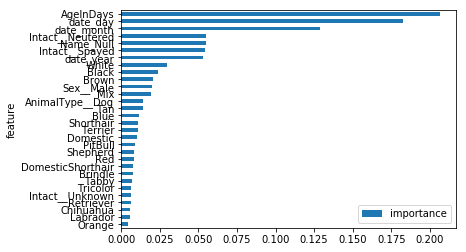

In [7]:
%matplotlib inline
feat_imp.plot.barh()

In [8]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test,y_pred, labels = ['Adoption', 'Euthanasia', 'Transfer', 'Return_to_owner', 'Died']))
print(cm)



      0   1     2    3  4
0  2556  11   294  380  0
1    80  64   248   96  0
2   698  46  1770  273  3
3   610  19   191  630  0
4     5   2    31    4  2


In [10]:
# Confusion matrix
pd.crosstab(y_test, y_pred)

col_0,Adoption,Died,Euthanasia,Return_to_owner,Transfer
OutcomeType,,,,,
Adoption,2556,0,11,380,294
Died,5,2,2,4,31
Euthanasia,80,0,64,96,248
Return_to_owner,610,0,19,630,191
Transfer,698,3,46,273,1770
